Mounted at /content/drive


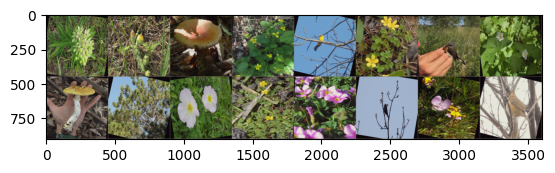

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random
from PIL import Image
from torch.utils.data import Dataset
import glob

from google.colab import drive
drive.mount('/content/drive')

import zipfile

zip_path = '/content/drive/MyDrive/your_dataset.zip'
extract_path = 'data/your_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Set seed
RANDOM_SEED = 0
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

plt.ion()   # interactive mode

# Define transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((460, 460)),
        transforms.RandomRotation(15),
        transforms.RandomCrop(448),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((448, 448)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ]),
    'test': transforms.Compose([
        transforms.Resize((448, 448)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ]),
}


data_dir = 'data/your_dataset'

# Load train and valid sets with ImageFolder
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'valid']}

# Custom Dataset for unlabeled test images
class UnlabeledImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = sorted(glob.glob(os.path.join(root_dir, '*')))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, os.path.basename(self.image_paths[idx])

# Load test set
test_dataset = UnlabeledImageDataset(os.path.join(data_dir, 'test'), transform=data_transforms['test'])

# Wrap DataLoaders
BATCH_SIZE = 16
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
    'test': torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
}

# Dataset sizes
dataset_sizes = {
    'train': len(image_datasets['train']),
    'valid': len(image_datasets['valid']),
    'test': len(test_dataset)
}

class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# imshow() function
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Preview training images
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out)  # title=[class_names[x] for x in classes]


Showing 64 images when batch_size=64.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/356M [00:00<?, ?B/s]

checkpoint_resume.pth not found.
Epoch 0/49
----------
Epoch 0: Mixup alpha = 1.0


<ipython-input-6-6706f281eea6>:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-6-6706f281eea6>:157: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


train Loss: 3.5322 Acc: 0.1946
valid Loss: 2.7080 Acc: 0.4100
Checkpoint updated: val_acc = 0.4100, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 1/49
----------
Epoch 1: Mixup alpha = 1.0
train Loss: 2.9598 Acc: 0.3167
valid Loss: 2.2778 Acc: 0.5433
Checkpoint updated: val_acc = 0.5433, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 2/49
----------
Epoch 2: Mixup alpha = 1.0
train Loss: 2.7940 Acc: 0.3542
valid Loss: 1.9715 Acc: 0.6633
Checkpoint updated: val_acc = 0.6633, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 3/49
----------
Epoch 3: Mixup alpha = 1.0
train Loss: 2.6276 Acc: 0.3751
valid Loss: 1.9091 Acc: 0.6567
EarlyStopping counter: 1 / 10

Epoch 4/49
----------
Epoch 4: Mixup alpha = 1.0
train Loss: 2.5579 Acc: 0.4103
valid Loss: 1.7804 Acc: 0.7433
Checkpoint updated: val_acc = 0.7433, saved as checkpoint_best.pth
Checkpoint saved t

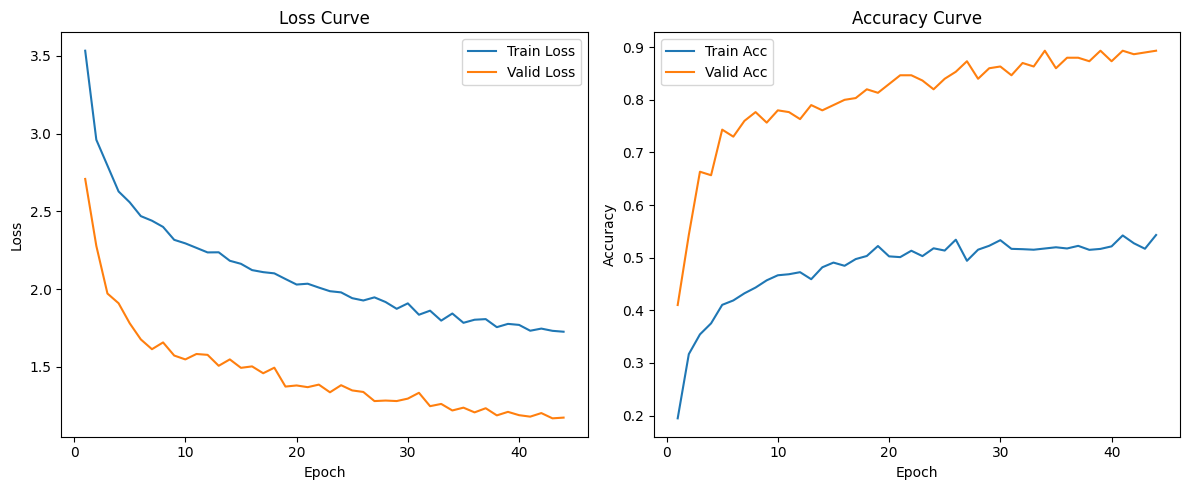

Saved training curve to figures/training_curves.png


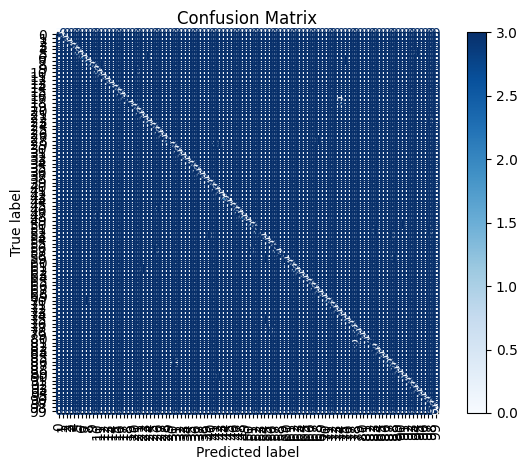

Saved confusion matrix to figures/confusion_matrix.png
Top-1 Accuracy: 0.8900
Top-5 Accuracy: 0.9667
Model saved as best_model_first.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 0/29
----------
Epoch 0: Mixup alpha = 0.2


<ipython-input-6-6706f281eea6>:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-6-6706f281eea6>:157: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


train Loss: 1.2483 Acc: 0.5423
valid Loss: 1.2355 Acc: 0.8800
Checkpoint updated: val_acc = 0.8800, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 1/29
----------
Epoch 1: Mixup alpha = 0.2
train Loss: 1.2323 Acc: 0.5350
valid Loss: 1.2489 Acc: 0.8700
EarlyStopping counter: 1 / 10

Epoch 2/29
----------
Epoch 2: Mixup alpha = 0.2
train Loss: 1.2286 Acc: 0.5277
valid Loss: 1.2228 Acc: 0.8900
Checkpoint updated: val_acc = 0.8900, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 3/29
----------
Epoch 3: Mixup alpha = 0.2
train Loss: 1.2471 Acc: 0.5405
valid Loss: 1.2214 Acc: 0.8967
Checkpoint updated: val_acc = 0.8967, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 4/29
----------
Epoch 4: Mixup alpha = 0.2
train Loss: 1.2379 Acc: 0.5442
valid Loss: 1.2342 Acc: 0.8733
EarlyStopping counter: 1 / 10

Epoch 5/29
----------
Epoch 5: Mixup alpha = 0.2
train

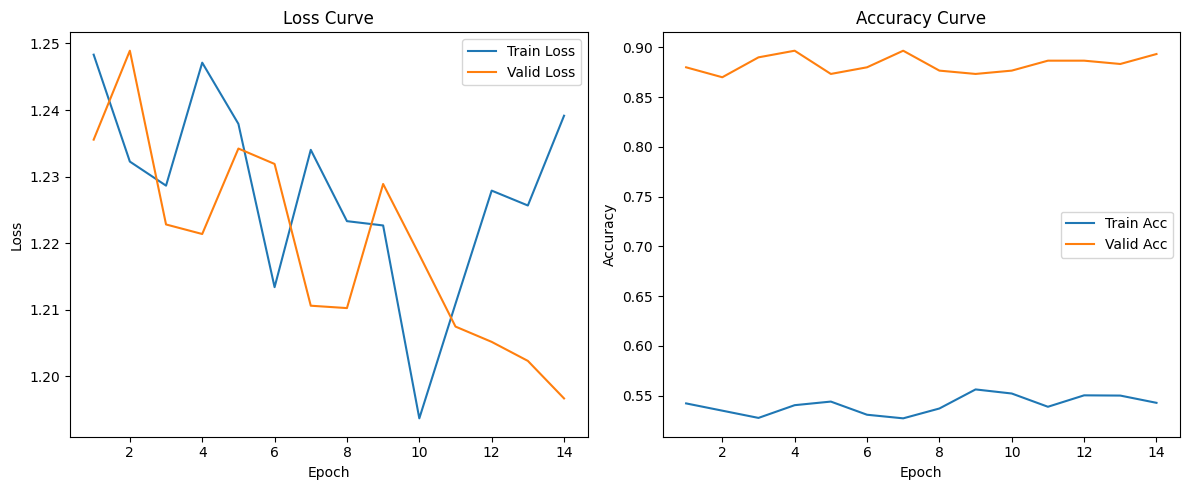

Saved training curve to figures/training_curves.png


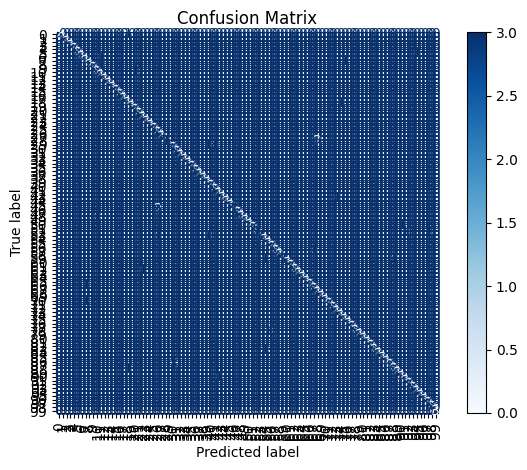

Saved confusion matrix to figures/confusion_matrix.png
Top-1 Accuracy: 0.8933
Top-5 Accuracy: 0.9567
Model saved as best_model_second.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 0/29
----------
Epoch 0: Mixup alpha = 0


<ipython-input-6-6706f281eea6>:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-6-6706f281eea6>:157: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


train Loss: 0.8288 Acc: 0.9991
valid Loss: 1.2318 Acc: 0.8900
Checkpoint updated: val_acc = 0.8900, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 1/29
----------
Epoch 1: Mixup alpha = 0
train Loss: 0.8269 Acc: 0.9994
valid Loss: 1.2319 Acc: 0.8867
EarlyStopping counter: 1 / 10

Epoch 2/29
----------
Epoch 2: Mixup alpha = 0
train Loss: 0.8267 Acc: 0.9995
valid Loss: 1.2207 Acc: 0.9000
Checkpoint updated: val_acc = 0.9000, saved as checkpoint_best.pth
Checkpoint saved to /content/drive/MyDrive/best_model.pth

Epoch 3/29
----------
Epoch 3: Mixup alpha = 0
train Loss: 0.8259 Acc: 0.9994
valid Loss: 1.2303 Acc: 0.8900
EarlyStopping counter: 1 / 10

Epoch 4/29
----------
Epoch 4: Mixup alpha = 0
train Loss: 0.8258 Acc: 0.9996
valid Loss: 1.2411 Acc: 0.8900
EarlyStopping counter: 2 / 10

Epoch 5/29
----------
Epoch 5: Mixup alpha = 0
train Loss: 0.8251 Acc: 0.9994
valid Loss: 1.2388 Acc: 0.8900
EarlyStopping counter: 3 / 10

Epoch 6/29
------

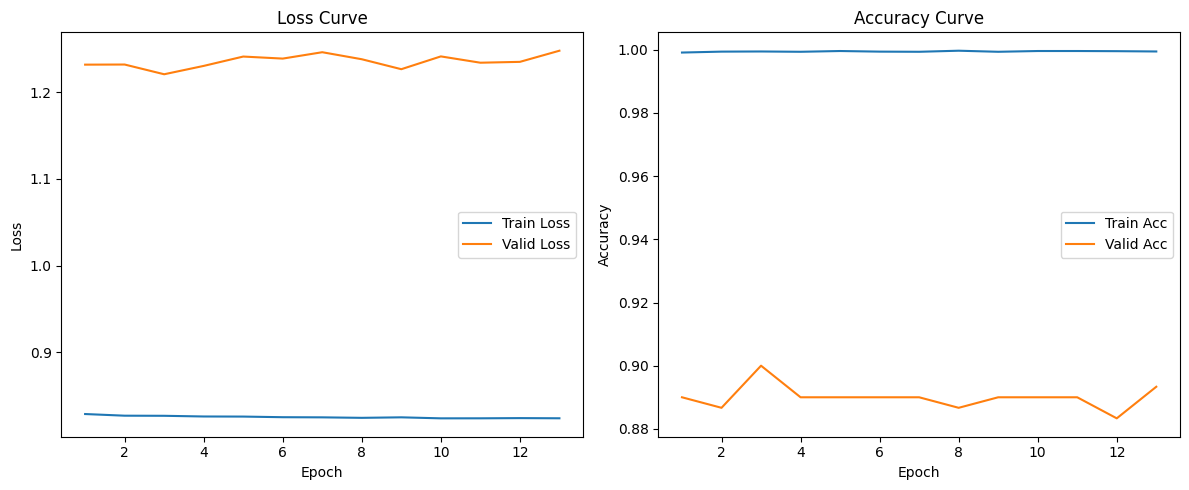

Saved training curve to figures/training_curves.png


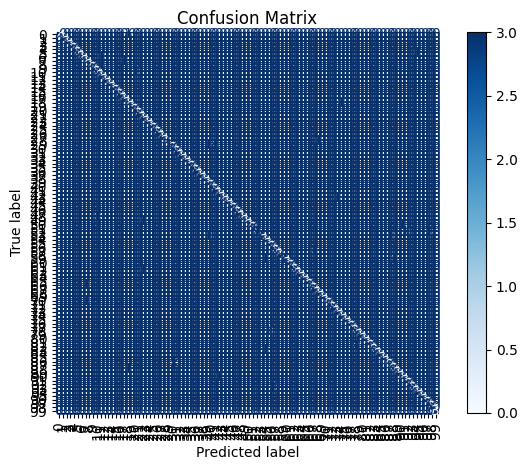

Saved confusion matrix to figures/confusion_matrix.png
Top-1 Accuracy: 0.8933
Top-5 Accuracy: 0.9600
Model saved as best_model_third.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from torch.cuda.amp import autocast, GradScaler
import time
import copy
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import timm
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, top_k_accuracy_score
import numpy as np
import torch.nn.functional as F
import torch

# ====== 0. Set up TensorBoard writer ======
tb_writer = SummaryWriter(log_dir='runs/exp1')
os.makedirs("figures", exist_ok=True)

# ====== 1. Model backbone + SpinalNet head ======
class SpinalNet_ResNet(nn.Module):
    def __init__(self, num_ftrs, Num_class):
        super(SpinalNet_ResNet, self).__init__()
        half_in_size = round(num_ftrs / 2)
        layer_width = 540
        self.half_in_size = half_in_size

        self.fc_spinal_layer1 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size, layer_width), nn.ReLU(inplace=True))
        self.fc_spinal_layer2 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size + layer_width, layer_width), nn.ReLU(inplace=True))
        self.fc_spinal_layer3 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size + layer_width, layer_width), nn.ReLU(inplace=True))
        self.fc_spinal_layer4 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size + layer_width, layer_width), nn.ReLU(inplace=True))
        self.fc_out = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(layer_width * 4, Num_class))

    def forward(self, x):
        x1 = self.fc_spinal_layer1(x[:, 0:self.half_in_size])
        x2 = self.fc_spinal_layer2(torch.cat([x[:, self.half_in_size:], x1], dim=1))
        x3 = self.fc_spinal_layer3(torch.cat([x[:, 0:self.half_in_size], x2], dim=1))
        x4 = self.fc_spinal_layer4(torch.cat([x[:, self.half_in_size:], x3], dim=1))
        x = torch.cat([x1, x2, x3, x4], dim=1)
        return self.fc_out(x)

class ResNeXt101_SpinalNet(nn.Module):
    def __init__(self, Num_class):
        super(ResNeXt101_SpinalNet, self).__init__()
        self.backbone = timm.create_model('resnest50d', pretrained=True, num_classes=0, global_pool='avg')
        num_ftrs = self.backbone.num_features
        self.spinal = SpinalNet_ResNet(num_ftrs, Num_class)

    def forward(self, x):
        x = self.backbone(x)
        return self.spinal(x)

Num_class = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft = ResNeXt101_SpinalNet(Num_class).to(device)

# ====== Load pretrained weights from checkpoint_resume.pth ======
resume_path = "/content/checkpoint_resume.pth"
if os.path.exists(resume_path):
    print("Loading pretrained weights from checkpoint_resume.pth...")
    state_dict = torch.load(resume_path, map_location=device)
    model_ft.load_state_dict(state_dict)
    print("Pretrained weights loaded successfully!")
else:
    print("checkpoint_resume.pth not found.")

# ====== 2. EarlyStopping Class ======
class EarlyStopping:
    def __init__(self, patience=8, verbose=False):
        self.patience = patience
        self.counter = 0
        self.best_acc = None
        self.early_stop = False
        self.verbose = verbose
        self.best_weights = None

    def __call__(self, val_acc, model):
        if self.best_acc is None or val_acc > self.best_acc:
            self.best_acc = val_acc
            self.counter = 0
            self.best_weights = copy.deepcopy(model.state_dict())

            # Save best checkpoint and trigger download
            torch.save(model.state_dict(), "checkpoint_best.pth")
            print(f"Checkpoint updated: val_acc = {val_acc:.4f}, saved as checkpoint_best.pth")
            # 自動儲存到 Google Drive
            ckpt_path = "/content/drive/MyDrive/best_model.pth"
            torch.save(model.state_dict(), ckpt_path)
            print(f"Checkpoint saved to {ckpt_path}")

        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} / {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# ====== 3. Mixup & Label Smoothing Loss ======
class SoftTargetCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super(SoftTargetCrossEntropy, self).__init__()
        self.smoothing = smoothing

    def forward(self, x, target):
        target = F.one_hot(target, num_classes=x.shape[1]).float()
        target = target * (1 - self.smoothing) + self.smoothing / x.shape[1]
        return torch.mean(torch.sum(-target * F.log_softmax(x, dim=-1), dim=-1))

def mixup_data(x, y, alpha=1.0):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# ====== 4. Train function ======
def train_model(model, criterion, optimizer, scheduler, num_epochs=50, patience=8, alpha=1.0):
    since = time.time()
    early_stopper = EarlyStopping(patience=patience, verbose=True)
    scaler = GradScaler()

    train_acc_hist, valid_acc_hist = [], []
    train_loss_hist, valid_loss_hist = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        print(f"Epoch {epoch}: Mixup alpha = {alpha}")

        for phase in ['train', 'valid']:
            model.train() if phase == 'train' else model.eval()
            running_loss = 0.0
            running_corrects = 0
            all_preds = []
            all_labels = []

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device).long()
                optimizer.zero_grad()

                if phase == 'train':
                    inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=alpha)

                with autocast():
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    if phase == 'train':
                        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
                    else:
                        loss = criterion(outputs, labels)

                if phase == 'train':
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels)
                if phase == 'valid':
                    all_preds.extend(outputs.detach().cpu().numpy())
                    all_labels.extend(labels.detach().cpu().numpy())

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            tb_writer.add_scalar(f"{phase}/Loss", epoch_loss, epoch)
            tb_writer.add_scalar(f"{phase}/Accuracy", epoch_acc, epoch)

            if phase == 'train':
                train_loss_hist.append(epoch_loss)
                train_acc_hist.append(epoch_acc.item())
            else:
                valid_loss_hist.append(epoch_loss)
                valid_acc_hist.append(epoch_acc.item())
                early_stopper(epoch_acc, model)
                if early_stopper.early_stop:
                    print("Early stopping triggered!")
                    model.load_state_dict(early_stopper.best_weights)
                    plot_training(train_loss_hist, valid_loss_hist, train_acc_hist, valid_acc_hist)
                    evaluate_model(model, all_preds, all_labels)
                    return model

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {early_stopper.best_acc:.4f}')
    model.load_state_dict(early_stopper.best_weights)
    plot_training(train_loss_hist, valid_loss_hist, train_acc_hist, valid_acc_hist)
    evaluate_model(model, all_preds, all_labels)
    return model

# ====== 5. Plotting Function and Save Figure ======
def plot_training(train_loss, valid_loss, train_acc, valid_acc):
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, valid_loss, label='Valid Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Acc')
    plt.plot(epochs, valid_acc, label='Valid Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.tight_layout()
    plt.savefig("figures/training_curves.png")
    plt.show()
    print("Saved training curve to figures/training_curves.png")

# ====== 6. Evaluation (Confusion Matrix + Top-k Accuracy) ======
def evaluate_model(model, all_outputs, all_labels):
    preds_top1 = np.argmax(all_outputs, axis=1)
    cm = confusion_matrix(all_labels, preds_top1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(xticks_rotation='vertical', cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("figures/confusion_matrix.png")
    plt.show()
    print("Saved confusion matrix to figures/confusion_matrix.png")

    top1 = top_k_accuracy_score(all_labels, all_outputs, k=1)
    top5 = top_k_accuracy_score(all_labels, all_outputs, k=5)
    print(f"Top-1 Accuracy: {top1:.4f}")
    print(f"Top-5 Accuracy: {top5:.4f}")

# ====== 7. Optimizer, Scheduler, Training ======
criterion = SoftTargetCrossEntropy(smoothing=0.1)

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
exp_lr_scheduler = lr_scheduler.CosineAnnealingLR(optimizer_ft, T_max=50)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=50, patience=10, alpha=1.0)

torch.save(model_ft.state_dict(), "best_model_first.pth")
print("Model saved as best_model_first.pth")
from google.colab import files
files.download("best_model_first.pth")

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
exp_lr_scheduler = lr_scheduler.CosineAnnealingLR(optimizer_ft, T_max=20)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=30, patience=10, alpha=0.2)

torch.save(model_ft.state_dict(), "best_model_second.pth")
print("Model saved as best_model_second.pth")
files.download("best_model_second.pth")


optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.0001, momentum=0.9, weight_decay=1e-4)
exp_lr_scheduler = lr_scheduler.CosineAnnealingLR(optimizer_ft, T_max=20)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=30, patience=10, alpha=0)

torch.save(model_ft.state_dict(), "best_model_third.pth")
print("Model saved as best_model_third.pth")
files.download("best_model_third.pth")



# 預測


In [ ]:
import torch
from torchvision import transforms, datasets
from PIL import Image
import glob
import os
import pandas as pd
from tqdm import tqdm
import timm
import torch.nn as nn
from google.colab import files

# ========= 設定參數 =========
test_dir = 'data/your_dataset/test'           # 測試資料夾
train_dir = 'data/your_dataset/train'         # 訓練資料夾（用來抓 class_names）
model_path = 'checkpoint_best.pth'          # 訓練好的模型權重
output_csv = 'prediction.csv'                 # 輸出結果檔
Num_class = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ========= 讀取類別名稱 =========
class_names = datasets.ImageFolder(train_dir).classes

# ========= 資料前處理（與訓練一致）=========
transform = transforms.Compose([
    transforms.Resize((448, 448)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
])

# ========= SpinalNet 結構 =========
class SpinalNet_ResNet(nn.Module):
    def __init__(self, num_ftrs, Num_class):
        super(SpinalNet_ResNet, self).__init__()
        half_in_size = round(num_ftrs / 2)
        layer_width = 540
        self.half_in_size = half_in_size

        self.fc_spinal_layer1 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size, layer_width), nn.ReLU(inplace=True))
        self.fc_spinal_layer2 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size + layer_width, layer_width), nn.ReLU(inplace=True))
        self.fc_spinal_layer3 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size + layer_width, layer_width), nn.ReLU(inplace=True))
        self.fc_spinal_layer4 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(half_in_size + layer_width, layer_width), nn.ReLU(inplace=True))
        self.fc_out = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(layer_width * 4, Num_class))

    def forward(self, x):
        x1 = self.fc_spinal_layer1(x[:, 0:self.half_in_size])
        x2 = self.fc_spinal_layer2(torch.cat([x[:, self.half_in_size:], x1], dim=1))
        x3 = self.fc_spinal_layer3(torch.cat([x[:, 0:self.half_in_size], x2], dim=1))
        x4 = self.fc_spinal_layer4(torch.cat([x[:, self.half_in_size:], x3], dim=1))
        x = torch.cat([x1, x2, x3, x4], dim=1)
        return self.fc_out(x)

# ========= ResNeSt50d + SpinalNet =========
class ResNeSt50d_SpinalNet(nn.Module):
    def __init__(self, Num_class):
        super().__init__()
        self.backbone = timm.create_model('resnest50d', pretrained=False, num_classes=0, global_pool='avg')
        self.spinal = SpinalNet_ResNet(self.backbone.num_features, Num_class)

    def forward(self, x):
        x = self.backbone(x)
        return self.spinal(x)

# ========= 初始化模型並載入權重 =========
model = ResNeSt50d_SpinalNet(Num_class)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# ========= 預測所有測試圖像 =========
image_paths = sorted(glob.glob(os.path.join(test_dir, '*.jpg')))
predictions = []

with torch.no_grad():
    for path in tqdm(image_paths):
        image = Image.open(path).convert('RGB')
        image = transform(image).unsqueeze(0).to(device)
        output = model(image)
        pred_index = torch.argmax(output, 1).item()
        pred_label = class_names[pred_index]
        image_name = os.path.splitext(os.path.basename(path))[0]
        predictions.append((image_name, pred_label))

# ========= 儲存為 CSV =========
df = pd.DataFrame(predictions, columns=['image_name', 'pred_label'])
df.to_csv(output_csv, index=False)
print(f"Saved prediction results to {output_csv}")

# ========= 自動下載 =========
files.download(output_csv)


100%|██████████| 2344/2344 [01:11<00:00, 33.00it/s]

Saved prediction results to prediction.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>